In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Found 3322 images belonging to 4 classes.
Found 444 images belonging to 4 classes.
Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 929s 9s/step - accuracy: 0.6349 - loss: 0.9240 - val_accuracy: 0.8491 - val_loss: 0.4730
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 897s 9s/step - accuracy: 0.8428 - loss: 0.4423 - val_accuracy: 0.8423 - val_loss: 0.4253
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 898s 9s/step - accuracy: 0.8630 - loss: 0.3734 - val_accuracy: 0.8649 - val_loss: 0.3806
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 902s 9s/step - accuracy: 0.8884 - loss: 0.3404 - val_accuracy: 0.8784 - val_loss: 0.3879
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 875s 8s/step - accuracy: 0.8907 - loss: 0.3269 - val_accuracy: 0.8716 - val_loss: 0.3701
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 949s 9s/step - accuracy: 0.8878 - loss: 0.3186 - val_accuracy: 0.8851 - val_loss: 0.3579
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1002s 10s/step - accuracy: 0.9013 - loss: 0.2890 - val_accuracy: 0.8604 - val_loss: 0.3566
Epoch 8/10
1

14/14 ━━━━━━━━━━━━━━━━━━━━ 98s 7s/step - accuracy: 0.8936 - loss: 0.3036 
Validation Accuracy: 0.89


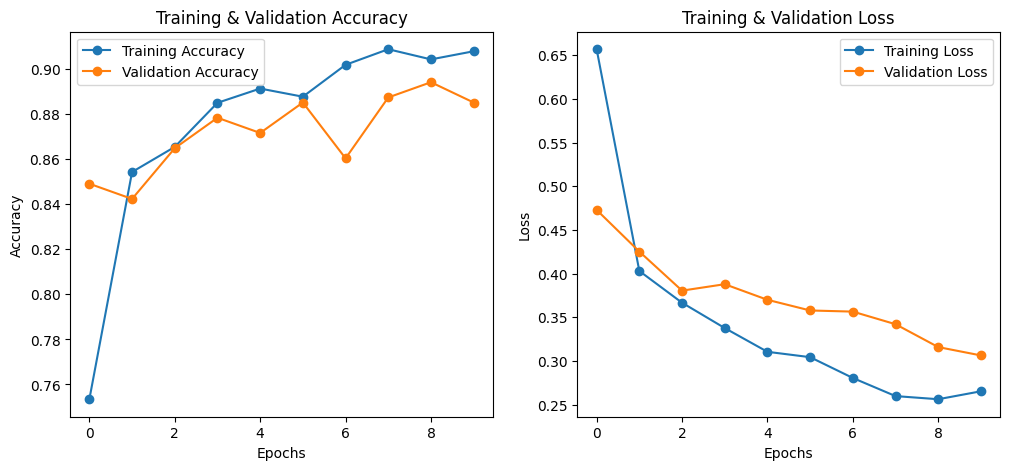

In [5]:
import matplotlib.pyplot as plt

train_dir = "natural_disaster_dataset/train"
val_dir = "natural_disaster_dataset/validation"
num_classes = 4
img_size = 224
batch_size = 32

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

model.save("vgg16_disaster_model.h5")

loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc:.2f}")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

plt.show()


In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model = load_model("vgg16_disaster_model.h5")

class_labels = ["cyclone", "earthquake", "flood", "wildfire"] 

def predict_image(img_path):
    img_size = 224
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.show()

    return class_labels[predicted_class], confidence


CYCLONE
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


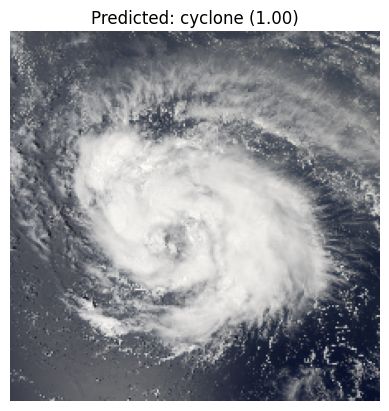

Predicted Class: cyclone, Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


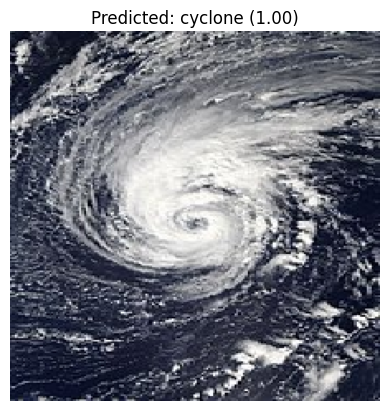

Predicted Class: cyclone, Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


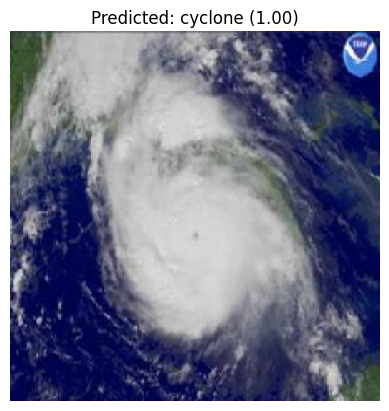

Predicted Class: cyclone, Confidence: 1.00


In [18]:
print("CYCLONE")
image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\cyclone\801.jpg" 
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\cyclone\818.jpg" 
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\cyclone\835.jpg" 
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")


WILDFIRE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


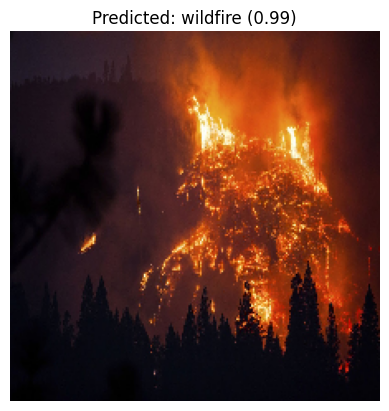

Predicted Class: wildfire, Confidence: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


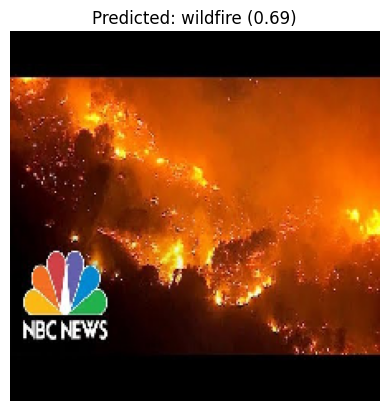

Predicted Class: wildfire, Confidence: 0.69
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


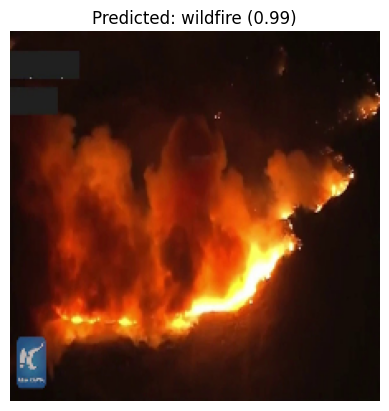

Predicted Class: wildfire, Confidence: 0.99


In [14]:
print("WILDFIRE")
image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\wildfire\931.jpg"  
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\wildfire\970.jpg"  
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\wildfire\978.jpg"  
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

EARTHQUAKE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


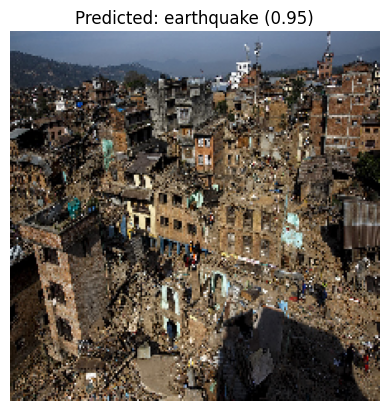

Predicted Class: earthquake, Confidence: 0.95
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


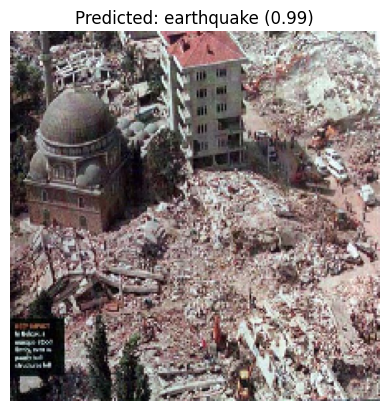

Predicted Class: earthquake, Confidence: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


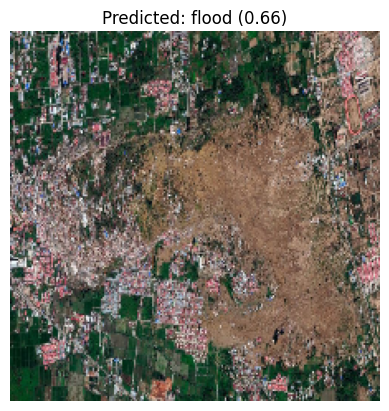

Predicted Class: flood, Confidence: 0.66


In [15]:
print("EARTHQUAKE")
image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\earthquake\1161.jpg" 
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\earthquake\1242.jpg"
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\earthquake\1303.jpg" 
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")


FLOOD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


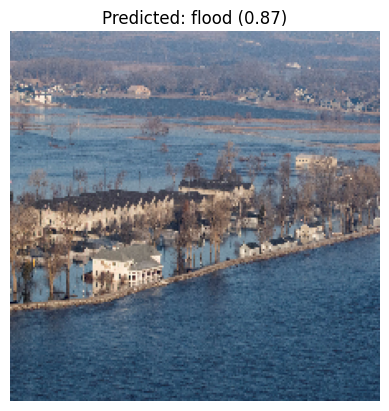

Predicted Class: flood, Confidence: 0.87
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


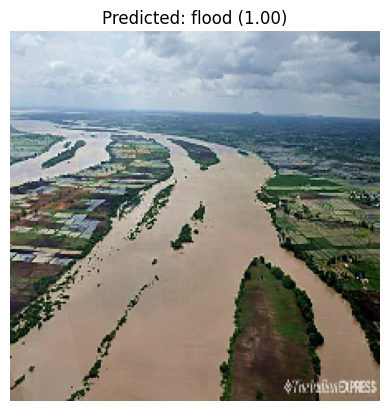

Predicted Class: flood, Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


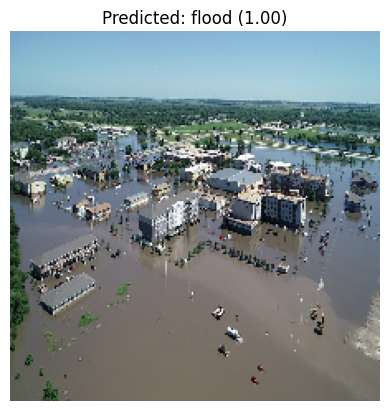

Predicted Class: flood, Confidence: 1.00


In [16]:
print("FLOOD")
image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\flood\918.jpg"
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\flood\955.jpg"
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

image_path = r"D:\OneDrive\Desktop\DEEP L\disaster-classification-with-xai\natural_disaster_dataset\test\flood\987.jpg"
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

Found 444 images belonging to 4 classes.


C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 145s 10s/step


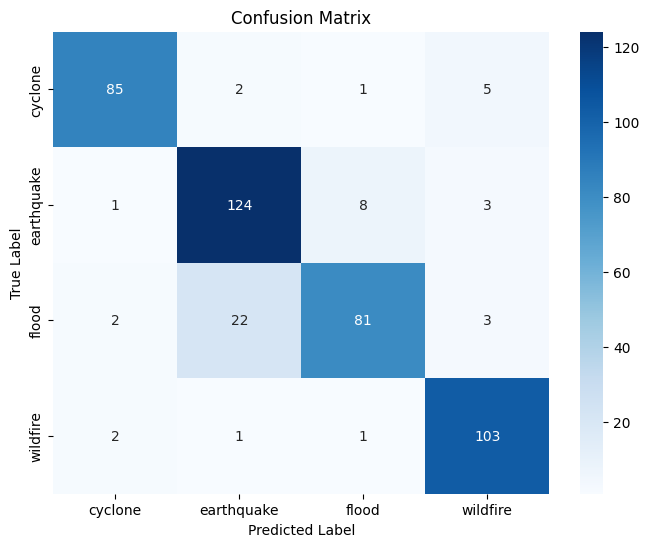

Classification Report:
              precision    recall  f1-score   support

     cyclone       0.94      0.91      0.93        93
  earthquake       0.83      0.91      0.87       136
       flood       0.89      0.75      0.81       108
    wildfire       0.90      0.96      0.93       107

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.89       444
weighted avg       0.89      0.89      0.88       444



In [5]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

def compute_confusion_matrix(model_path, val_generator, class_labels):
    model_path = "vgg16_disaster_model.h5"
    model = load_model(model_path)
    
    # Get the true labels and predicted labels
    y_true = val_generator.classes
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Define class labels
class_labels = ["cyclone", "earthquake", "flood", "wildfire"]

# Load validation dataset generator
val_dir = "natural_disaster_dataset/validation"
img_size = 224
batch_size = 32
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compute and display confusion matrix
compute_confusion_matrix("vgg16_disaster_model.h5", val_generator, class_labels)
